### ---*---  Minimizing Churn Rate Through Analysis of Financial Habits #---*---

In [19]:
import numpy as np
from numpy import random, random_intel

In [20]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sn

In [21]:
def data_preprocessing(): 
    print("====== # Users who were 60 days enrolled, churn in the next 30 ======")
    dataset = pd.read_csv('churn_data.csv') 
    print("Viewing the Data top 5 row \n",dataset.head(5))
    print("=================================================================")
    print("Feature Name\n",dataset.columns)
    print("=================================================================")
    print("Distribution of Numerical Variables\n",dataset.describe())
     
    # Cleaning Data
    dataset[dataset.credit_score < 300]
    dataset = dataset[dataset.credit_score >= 300]

    # Removing NaN
    print("=================================================================")
    print("Check NaN Values \n",dataset.isna().any())
    print("=================================================================")
    print("Total NaN values \n",dataset.isna().sum())
    dataset = dataset.drop(columns = ['credit_score', 'rewards_earned'])
    return dataset



In [22]:
dataset = data_preprocessing()

====== # Users who were 60 days enrolled, churn in the next 30 ======
Viewing the Data top 5 row 
     user  churn   age housing  credit_score  deposits  withdrawal  \
0  55409      0  37.0      na           NaN         0           0   
1  23547      0  28.0       R         486.0         0           0   
2  58313      0  35.0       R         561.0        47           2   
3   8095      0  26.0       R         567.0        26           3   
4  61353      1  27.0      na           NaN         0           0   

   purchases_partners  purchases  cc_taken  ...  waiting_4_loan  \
0                   0          0         0  ...               0   
1                   1          0         0  ...               0   
2                  86         47         0  ...               0   
3                  38         25         0  ...               0   
4                   2          0         0  ...               0   

   cancelled_loan  received_loan  rejected_loan  zodiac_sign  \
0               0  

### ========================== EDA ==============================

In [23]:
def Bar_plot(dataset):
    dataset2 = dataset.drop(columns = ['user', 'churn'])
    print("=================  Histograme of numerical columns ===========")
    fig = plt.figure(figsize=(25, 23))
    plt.suptitle('Histograms of Numerical Columns', fontsize=30)
    for i in range(1, dataset2.shape[1] + 1):
        plt.subplot(6, 5, i)
        f = plt.gca()
        f.axes.get_yaxis().set_visible(False)
        f.set_title(dataset2.columns.values[i - 1])

        vals = np.size(dataset2.iloc[:, i - 1].unique())

        plt.hist(dataset2.iloc[:, i - 1], bins=vals, color='#3F5D7D')
        if i==23:
            plt.xticks(rotation=90)
    plt.tight_layout(h_pad=0.8, w_pad=0.5 ,rect=[0, 0.03, 1, 0.95])
    plt.show()



=================  Histograme of numerical columns ===========


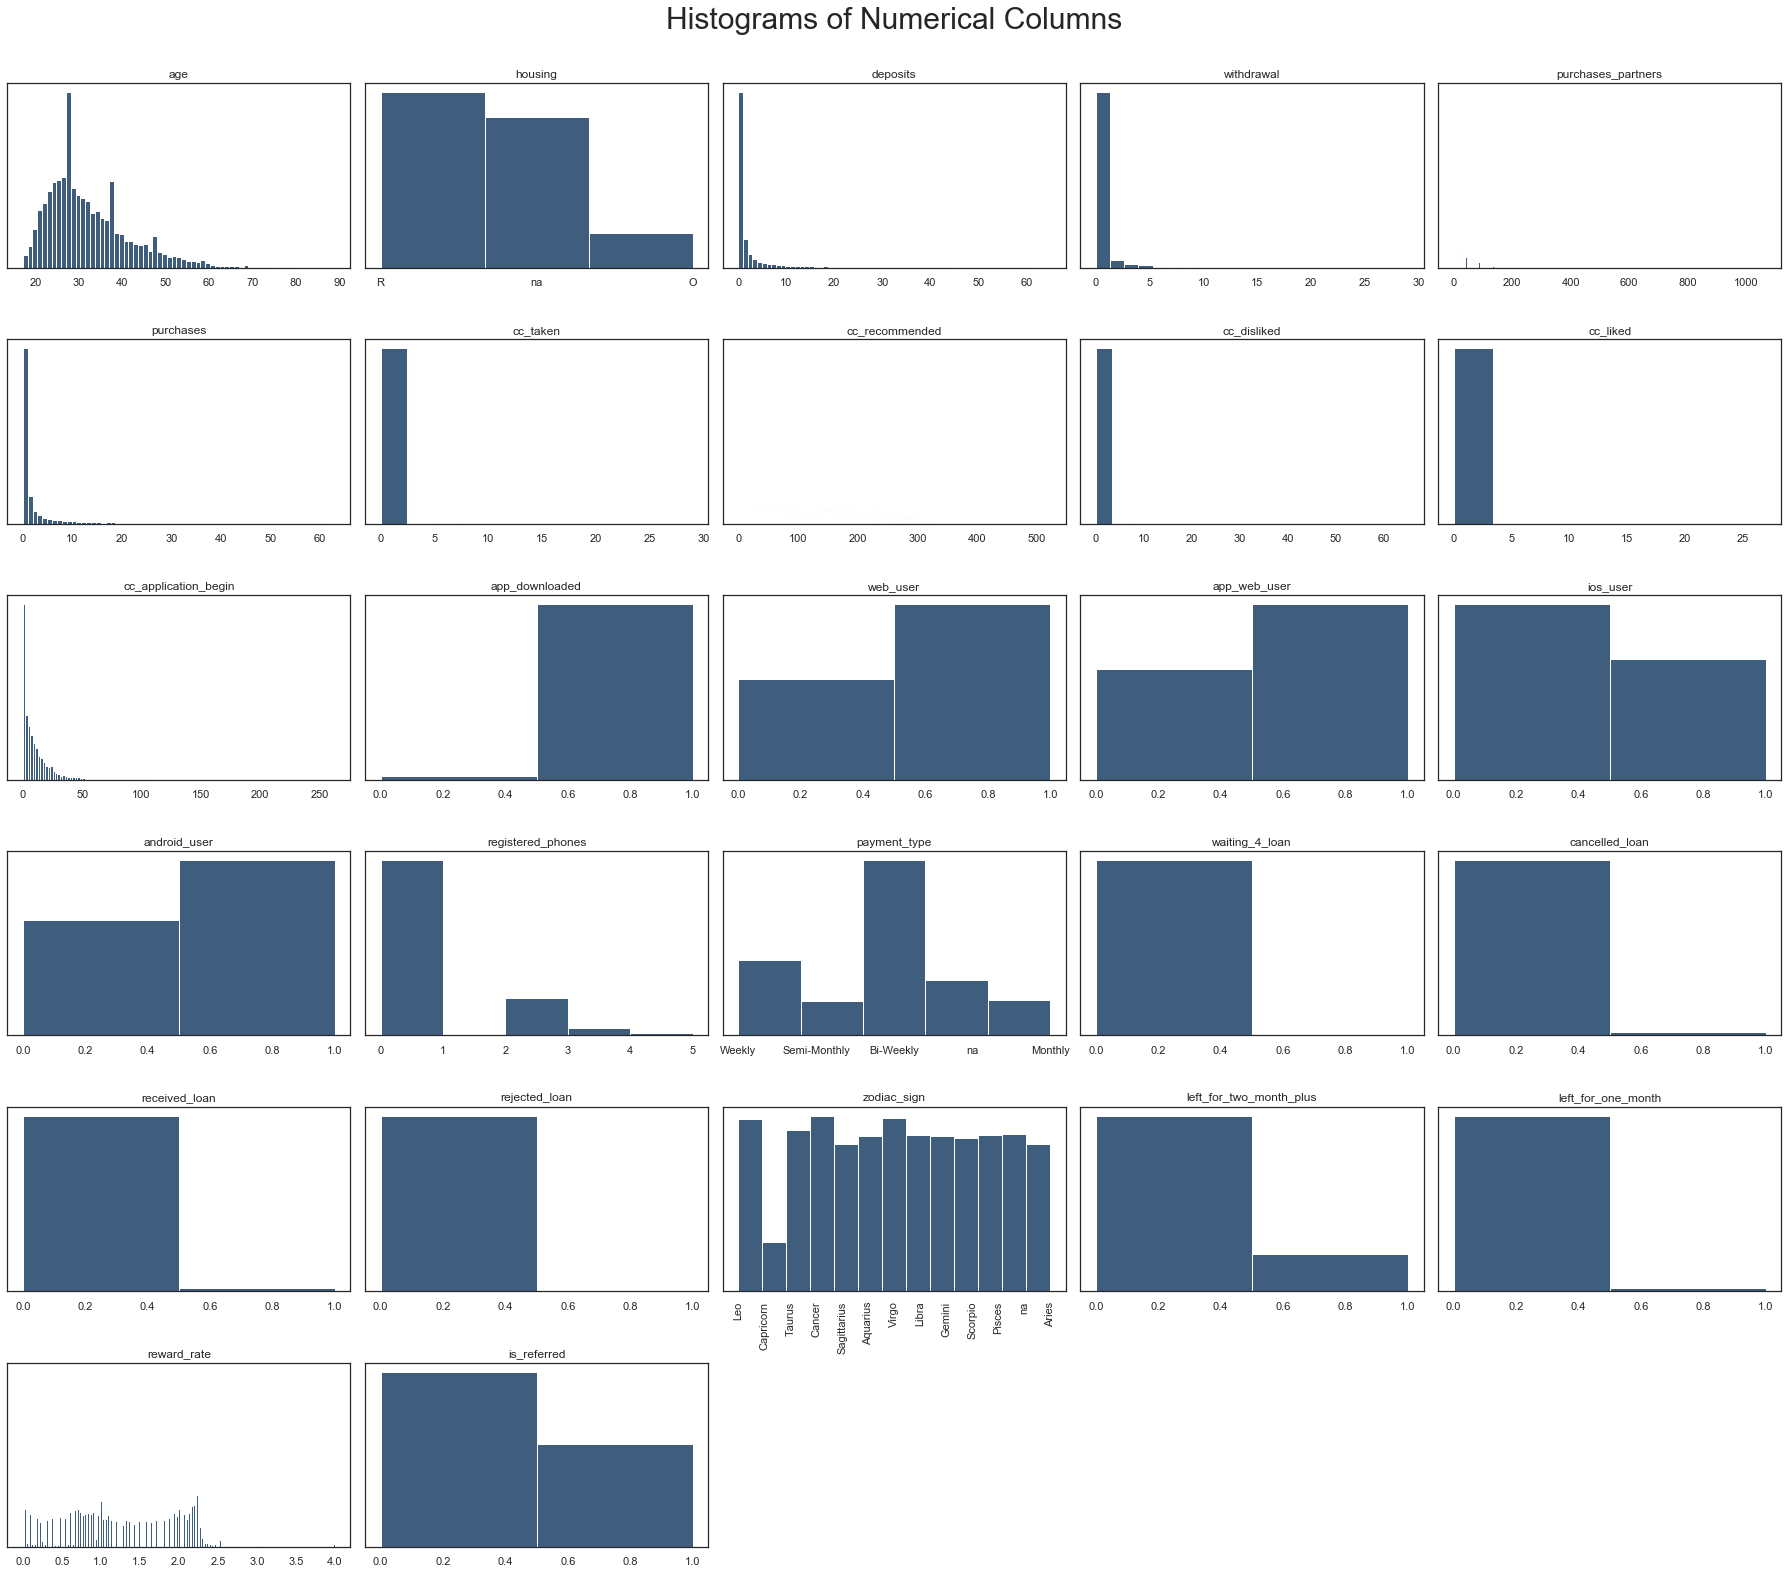

In [24]:
Bar_plot(dataset)

In [25]:

def pie_plot(dataset):
    print("=========================== Bar plot ======================\n")
    dataset2 = dataset[['housing', 'is_referred', 'app_downloaded',
                    'web_user', 'app_web_user', 'ios_user',
                    'android_user', 'registered_phones', 'payment_type',
                    'waiting_4_loan', 'cancelled_loan',
                    'received_loan', 'rejected_loan', 'zodiac_sign',
                    'left_for_two_month_plus', 'left_for_one_month', 'is_referred']]
    fig = plt.figure(figsize=(35, 32))
    plt.suptitle('Pie Chart Distributions', fontsize=20)
    for i in range(1, dataset2.shape[1] + 1):
        plt.subplot(6, 3, i)
        f = plt.gca()
        f.axes.get_yaxis().set_visible(False)
        f.set_title(dataset2.columns.values[i - 1])

        values = dataset2.iloc[:, i - 1].value_counts(normalize = True).values
        index = dataset2.iloc[:, i - 1].value_counts(normalize = True).index
        plt.pie(values, labels = index, autopct='%1.1f%%',radius=5)
        plt.axis('equal')
    fig.tight_layout(h_pad=0.8, w_pad=0.5 ,rect=[0, 0.03, 1, 0.95])
    plt.show()

=========================== Bar plot ======================



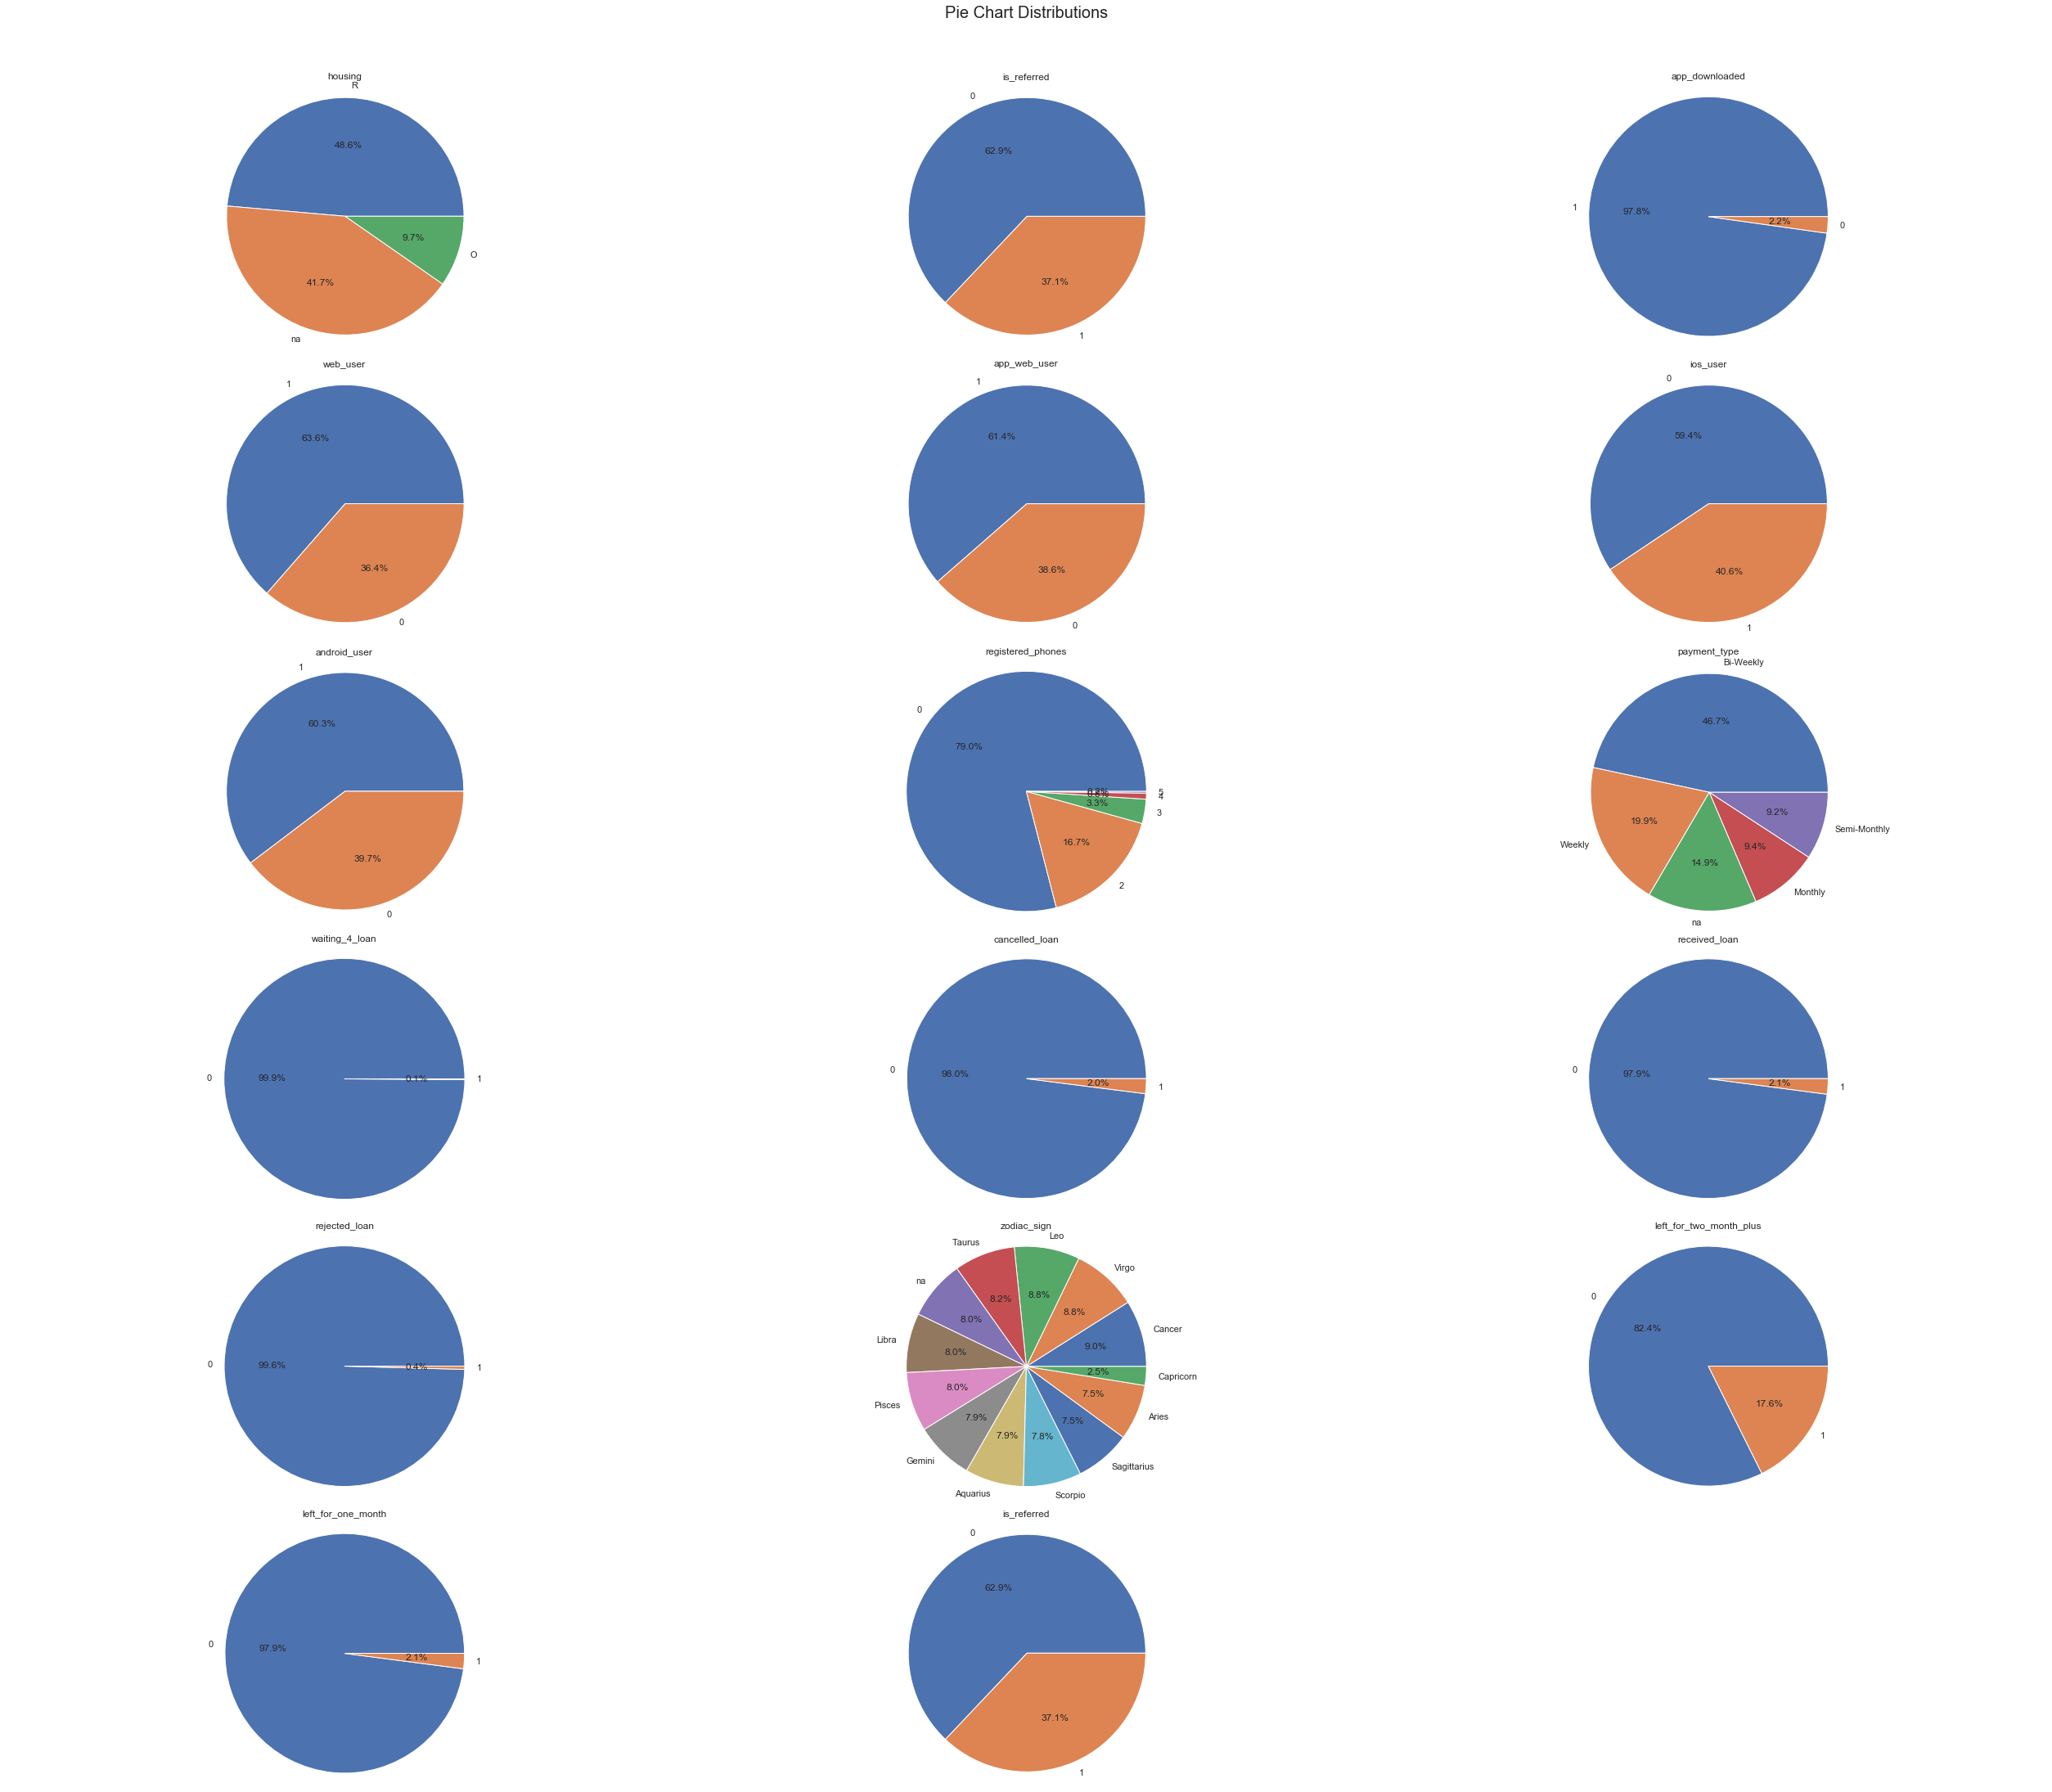

In [26]:
pie_plot(dataset)

In [27]:
def unevn_feature(dataset):
    dataset2 = dataset[['housing', 'is_referred', 'app_downloaded',
                    'web_user', 'app_web_user', 'ios_user',
                    'android_user', 'registered_phones', 'payment_type',
                    'waiting_4_loan', 'cancelled_loan',
                    'received_loan', 'rejected_loan', 'zodiac_sign',
                    'left_for_two_month_plus', 'left_for_one_month', 'is_referred']]
    
    print("========== waiting_4_loan equal to Ttrue ========= \n",dataset[dataset2.waiting_4_loan == 1].churn.value_counts())
    print("========== cacelled_loan equal to Ttrue ========= \n",dataset[dataset2.cancelled_loan == 1].churn.value_counts())
    print("========== recevied_loan equal to Ttrue ========= \n",dataset[dataset2.received_loan == 1].churn.value_counts())
    print("========== rejected_loan equal to Ttrue ========= \n",dataset[dataset2.rejected_loan == 1].churn.value_counts())
    print("========== left_for_one_month to Ttrue ========= \n",dataset[dataset2.left_for_one_month == 1].churn.value_counts())
    return dataset2

In [28]:
df = unevn_feature(dataset)

========== waiting_4_loan equal to Ttrue ========= 
 0    15
1     3
Name: churn, dtype: int64
========== cacelled_loan equal to Ttrue ========= 
 0    194
1    187
Name: churn, dtype: int64
========== recevied_loan equal to Ttrue ========= 
 1    233
0    162
Name: churn, dtype: int64
========== rejected_loan equal to Ttrue ========= 
 1    64
0    17
Name: churn, dtype: int64
========== left_for_one_month to Ttrue ========= 
 1    207
0    184
Name: churn, dtype: int64


In [29]:
def corelation_with_response(dataset,df):
    df.drop(columns = ['housing', 'payment_type',
                         'registered_phones', 'zodiac_sign']).corrwith(dataset.churn).plot.bar(figsize=(20,10),
              title = 'Correlation with Response variable',
              fontsize = 15, rot = 45,
              grid = True)
    plt.show()


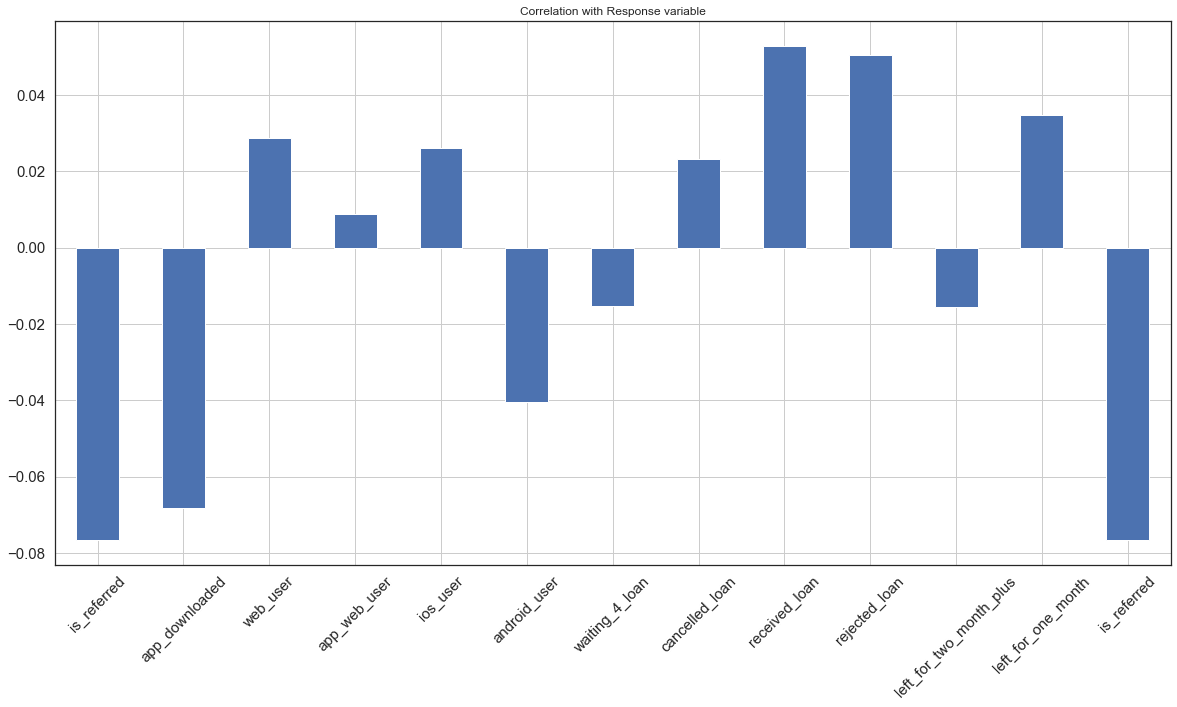

In [30]:
corelation_with_response(dataset,df)

In [31]:
def correlation(dataset):
    sn.set(style="white")
    # Compute the correlation matrix
    corr = dataset.drop(columns = ['user', 'churn']).corr()
    # Generate a mask for the upper triangle
    mask = np.zeros_like(corr, dtype=np.bool)
    mask[np.triu_indices_from(mask)] = True

    # Set up the matplotlib figure
    f, ax = plt.subplots(figsize=(18, 15))

    # Generate a custom diverging colormap
    cmap = sn.diverging_palette(220, 10, as_cmap=True)

    # Draw the heatmap with the mask and correct aspect ratio
    sn.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, center=0,
                square=True, linewidths=.5, cbar_kws={"shrink": .5})
    # Removing Correlated Fields
    dataset = dataset.drop(columns = ['app_web_user'])
    return dataset


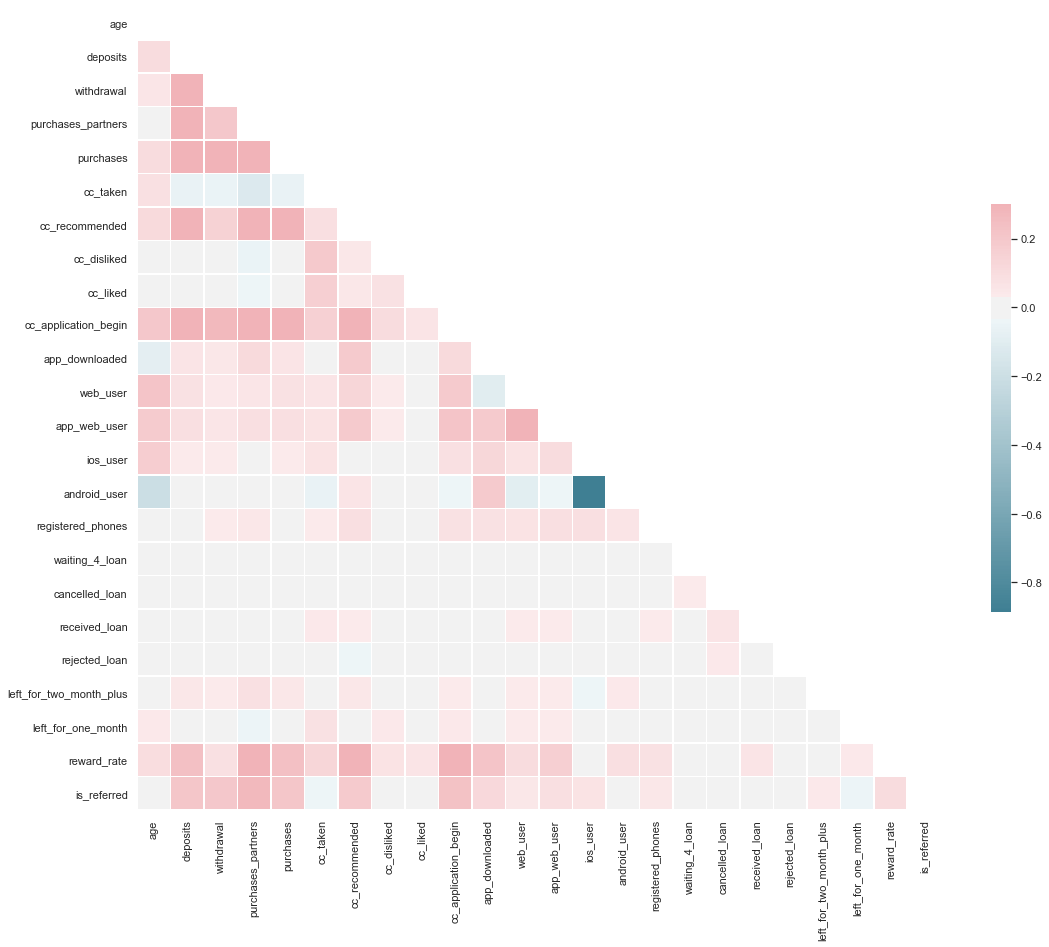

In [32]:
df1 = correlation(dataset)

In [33]:
df1.to_csv('churn_data_part2.csv', index = False)